# TAREFA 3 DE INTELIGÊNCIA ARTIFICIAL


| Nome  |TIA |
| ------------- | ------------- |
| Gabriel Brugnolli Sanches  |  31583083  |
| Gabriel Melo Francisco Correia  |  31371477  |
|  Leonardo Fuso Nuzzo   |  31500129  |
|  Virgínia Maria S. Melo Baroni    | 31844960  |
|  Werner W. Marin    |  31301614  |

# Importando as bibliotecas

A primeira coisa a se fazer é importar as bibliotecas necessárias para o projeto:

In [2]:
import matplotlib.pyplot as plt  
%matplotlib inline
import matplotlib
import numpy as np  
from sklearn.cluster import KMeans  
import seaborn as sns
from sklearn import datasets, metrics
from scipy.stats import mode
from sklearn.metrics import accuracy_score

# Preparando os dados

O Scikit-Learn possui um dataset de dígitos cursivos.
Cada dígito no dataset é representado por uma matriz de pixels binária, de dimensão 8 x 8.
Vamos importar esse dataset:

In [3]:
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

# Visualizando os dados

As imagens correspondentes aos dados são importadas na forma de um array 3-D com 1,797 amostras.
Vamos visualizar as primeiras 100 amostras:

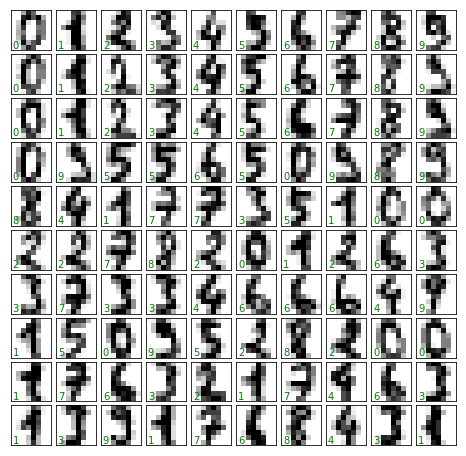

In [4]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
        transform=ax.transAxes, color='green')

# Primeira tarefa:
## Criando os clusters

In [9]:
kmeans = KMeans(n_clusters=10, random_state=0)  
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

# Exibindo os resultados:
Para ver o que o agrupamento criou vamos olhar o centro de cada grupo (cluster) – o protótipo para cada grupo –, usando o código a seguir.

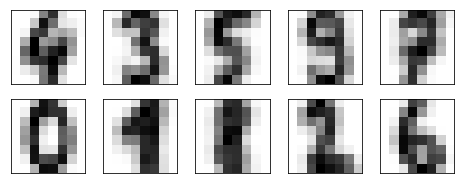

In [10]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
        axi.set(xticks=[], yticks=[])
        axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

O output deverá ser 10 centroids criados a partir do nosso dataset.
Você também pode medir numericamente a correção do agrupamento, a partir do seguinte código:

In [7]:
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
accuracy_score(digits.target, labels)

0.7935447968836951

Agora, exibindo um gráfico com a relação de acertos e erros, com base na label das amostras:

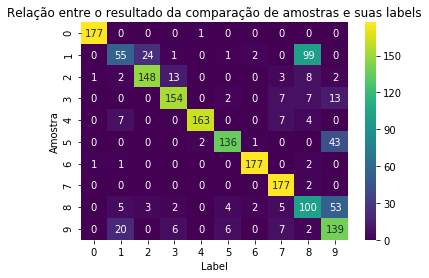

In [8]:
mat = metrics.confusion_matrix(labels,digits.target)
sns.heatmap(mat.T, annot=True, fmt='g', cmap='viridis',
           xticklabels=digits.target_names,
           yticklabels=digits.target_names)

plt.title('Relação entre o resultado da comparação de amostras e suas labels')
plt.xlabel("Label")
plt.ylabel("Amostra")
plt.savefig('relacao_acerto_labels', dpi=350)

# Segunda tarefa:

Usando a tabela com os resultados obtidos como referêncial:

1. Quais dígitos foram corretamente agrupados?
   - Das 10 amostras, as amostras verificadas como 0,2,3,4,5,6,7 e 9 foram quase que totalmente agrupadas de forma correta.
2. Quais dígitos foram erroneamente agrupados?
   - Todos os dígitos, em algum nível, foram erroneamente agrupados. Pensando em média de resultados corretos obtidos, porém, o 8 e o 1 foram os mais frequentemente confundidos.
   - O 8 foi bastante confundido com o 1.
   - O 9 foi bastante confundido com o 5.